In [1]:
from ipynb.fs.full.config_helper import get_agg_config

import warnings
warnings.filterwarnings("ignore")

In [2]:
NUM_OF_PARTIES = 20
ROUNDS = 150
EPOCHS = 3

dataset='femnist'

In [3]:
from ibmfl.aggregator.aggregator import Aggregator

agg_config = get_agg_config(NUM_OF_PARTIES, ROUNDS, EPOCHS)
aggregator = Aggregator(config_dict=agg_config)

aggregator.start()

Yaml configuration file not found: log_config.yaml


2021-06-10T18:54:55.477Z | 1.0.5 | INFO | ibmfl.util.config                                  | Getting Aggregator details from arguments.
2021-06-10T18:54:55.478Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-10T18:54:55.478Z | 1.0.5 | INFO | ibmfl.util.config                                  | No metrics recorder config provided for this setup.
2021-06-10T18:54:55.479Z | 1.0.5 | INFO | ibmfl.util.config                                  | No model config provided for this setup.
2021-06-10T18:54:55.858Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-10T18:54:55.859Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | RestSender initialized
2021-06-10T18:54:55.859Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.START
2021-06-10T18:54:55.860Z | 1.0.5 | INFO | ibmfl.connection.flask_connection 

2021-06-10T18:55:55.771Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-10T18:55:55.773Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party13
2021-06-10T18:55:55.773Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:13
2021-06-10T18:55:55.774Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 18:55:55] "POST /6 HTTP/1.1" 200 -
2021-06-10T18:55:58.328Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-10T18:55:58.330Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party14
2021-06-10T18:55:58.331Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:14
2021-06-10T18:55:58.332Z | 1.0.5 | INFO | werkzeug                               

In [4]:
eval_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
eval_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
train_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
train_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
iterations = [[] for _ in range(NUM_OF_PARTIES)]

def get_metrics(metrics):
    keys = list(metrics['party'].keys())
    keys.sort()
    for i in range(len(keys)):
        eval_party_acc[i].append(metrics['party'][keys[i]]['test']['acc'])
        eval_party_loss[i].append(metrics['party'][keys[i]]['test']['loss'])
        train_party_acc[i].extend(metrics['party'][keys[i]]['train']['acc'])
        train_party_loss[i].extend(metrics['party'][keys[i]]['train']['loss'])
        iterations[i].append(metrics['fusion']['curr_round']*agg_config['hyperparams']['local']['training']['epochs'])

mh = aggregator.fusion.metrics_manager
mh.register(get_metrics)


aggregator.start_training()

2021-06-10T18:56:27.713Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating Global Training.
2021-06-10T18:56:27.714Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Warm start disabled.
2021-06-10T18:56:27.715Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model updateNone
2021-06-10T18:56:27.715Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T18:56:27.716Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T18:56:28.323Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T18:56:28.323Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T18:56:28.324Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T18:56:28.325

2021-06-10T18:57:53.769Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 18:57:53] "POST /7 HTTP/1.1" 200 -
2021-06-10T18:57:53.769Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 18:57:53] "POST /7 HTTP/1.1" 200 -
2021-06-10T18:57:53.828Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 18:57:53] "POST /7 HTTP/1.1" 200 -
2021-06-10T18:57:58.774Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:90
2021-06-10T18:57:58.775Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T18:57:58.775Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T18:57:58.776Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T18:57:58.888Z | 1.0.5 | IN

2021-06-10T18:58:39.933Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 18:58:39] "POST /7 HTTP/1.1" 200 -
2021-06-10T18:58:42.074Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T18:58:42.074Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T18:58:42.075Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T18:58:42.075Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T18:58:42.129Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f750c6d8358>
2021-06-10T18:58:42.130Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T18:58:42.130Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-10T18:59:25.098Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T18:59:25.099Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T18:59:25.151Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f751426ca58>
2021-06-10T18:59:25.152Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T18:59:25.152Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T18:59:27.786Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T18:59:27.788Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T18:59:27.789Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-10T19:00:07.917Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T19:00:07.918Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T19:00:10.516Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T19:00:10.518Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T19:00:10.518Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T19:00:10.525Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T19:00:15.532Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T19:00:20.539Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10

2021-06-10T19:00:52.912Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T19:00:52.917Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T19:00:52.918Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T19:00:57.922Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T19:01:02.934Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T19:01:07.942Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T19:01:12.946Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T19:01:17.952Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T19:01:22

2021-06-10T19:01:40.442Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T19:01:45.450Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T19:01:50.470Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T19:01:55.474Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T19:02:00.478Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T19:02:05.490Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T19:02:10.476Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:02:10.495Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T19:02:11.225

2021-06-10T19:02:38.187Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T19:02:43.198Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T19:02:48.202Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T19:02:49.434Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:02:49.758Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:02:49] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:02:51.170Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:02:51.749Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:02:51] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:02:52.160Z | 1.0.5 | INFO | ibmfl.connection.flask_connect

2021-06-10T19:03:33.189Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:03:33.984Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:03:33] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:03:35.446Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T19:03:37.111Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:03:37.373Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:03:37] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:03:38.385Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:03:38.481Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:03:38] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:03:38.490Z | 1.0.5 | 

2021-06-10T19:04:16.606Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:04:16.612Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:04:16] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:04:16.626Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:04:17.126Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:04:17] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:04:17.649Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:04:17] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:04:18.022Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:04:18.026Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:04:18.429Z | 1.0.5 

2021-06-10T19:05:02.046Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T19:05:02.223Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:05:02.573Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:05:02] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:05:03.702Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:05:03.803Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:05:03] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:05:03.861Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:05:03.873Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:05:03.885Z | 1.0.5 | INFO | ibmfl.connection.flask_con

2021-06-10T19:05:47.323Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:05:47.349Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:05:47.413Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:05:47.414Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:05:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:05:47.473Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:05:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:05:47.474Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:05:47.479Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:05:47.493Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T19:06:29.530Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:06:29.568Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:06:29] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:06:29.569Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:06:29.572Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:06:29.611Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:06:29] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:06:29.612Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:06:29.614Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:06:29.615Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T19:07:11.949Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:07:12.007Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:07:12.008Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:07:12] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:07:12.009Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:07:12.023Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:07:12.048Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:07:12] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:07:12.049Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:07:12.063Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T19:07:55.276Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:07:55.277Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:07:55] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:07:55.279Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:07:55.280Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:07:55.281Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:07:55.284Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:07:55.320Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:07:55.321Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-10T19:08:37.687Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:08:37.689Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:08:37] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:08:37.689Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:08:37.703Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:08:37.724Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:08:37.725Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:08:37] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:08:37.726Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:08:37.727Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T19:09:19.936Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:09:19.937Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:09:19] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:09:19.938Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:09:19.939Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:09:19.941Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:09:19.942Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:09:19.943Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:09:19.944Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-10T19:10:03.375Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:10:03] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:10:03.377Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:10:03.379Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:10:03.380Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:10:03.393Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:10:03.415Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:10:03] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:10:03.450Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:10:03] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:10:03.491Z | 1.0.5 

2021-06-10T19:10:45.324Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:10:45.324Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:10:45.359Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:10:45] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:10:45.394Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:10:45] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:10:45.431Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:10:45] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:10:45.469Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:10:45] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:10:45.520Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19

2021-06-10T19:11:28.788Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:11:28] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:11:28.824Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:11:28] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:11:28.877Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:11:28] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:11:28.899Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:11:28] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:11:28.935Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:11:28] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:11:28.983Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:11:28] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:11:29.010Z | 1.0.5 | INFO | werkzeug        

2021-06-10T19:12:10.969Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:12:10] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:12:10.993Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:12:10] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:12:11.030Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:12:11] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:12:11.070Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:12:11] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:12:11.104Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:12:11] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:12:11.172Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:12:11] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:12:11.173Z | 1.0.5 | INFO | werkzeug        

2021-06-10T19:12:53.352Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:12:53] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:12:53.429Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:12:53] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:12:53.432Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:12:53] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:12:53.484Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:12:53] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:12:53.505Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:12:53] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:12:55.956Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T19:12:55.956Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        

2021-06-10T19:13:36.838Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:13:36] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:13:36.873Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:13:36] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:13:36.907Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:13:36] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:13:38.601Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T19:13:38.602Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T19:13:38.603Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T19:13:38.603Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T19:13:38.668Z | 1.0.5 | IN

2021-06-10T19:14:18.631Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:14:18] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:14:22.613Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T19:14:22.614Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T19:14:22.615Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T19:14:22.615Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T19:14:22.667Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f7516f85438>
2021-06-10T19:14:22.667Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T19:14:22.668Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-10T19:15:05.677Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T19:15:05.678Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T19:15:05.744Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f750c7752e8>
2021-06-10T19:15:05.745Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T19:15:05.745Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T19:15:08.062Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T19:15:08.064Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T19:15:08.066Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-10T19:15:48.212Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T19:15:48.213Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T19:15:50.484Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T19:15:50.485Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T19:15:50.486Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T19:15:50.487Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T19:15:55.490Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T19:16:00.502Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10

2021-06-10T19:16:32.446Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T19:16:32.448Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T19:16:32.449Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T19:16:37.466Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T19:16:42.470Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T19:16:47.482Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T19:16:52.486Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T19:16:57.490Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T19:17:02

2021-06-10T19:17:20.694Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T19:17:25.698Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T19:17:30.705Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T19:17:35.710Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T19:17:40.719Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T19:17:44.970Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:17:45.629Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:17:45] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:17:45.726Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Ti

2021-06-10T19:18:18.319Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T19:18:23.326Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T19:18:28.330Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T19:18:32.160Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:18:32.791Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:18:32] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:18:33.333Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T19:18:34.929Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:18:35.066Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - 

2021-06-10T19:19:15.450Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T19:19:17.909Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:19:18.012Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:19:18] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:19:18.203Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:19:18.294Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:19:18] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:19:18.349Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:19:18.446Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:19:18] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:19:18.513Z | 1.0.5 | 

2021-06-10T19:19:54.085Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:19:54] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:19:58.072Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:19:58.289Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:19:58] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:19:58.426Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T19:19:59.817Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:19:59.841Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:19:59.908Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:19:59] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:19:59.951Z | 1.0.5 | 

2021-06-10T19:20:38.425Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:20:38.914Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:20:38] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:20:38.926Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:20:39.241Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:20:39] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:20:41.694Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T19:20:42.045Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:20:42.136Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:20:42] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:20:42.257Z | 1.0.5 | 

2021-06-10T19:21:27.229Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:21:27] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:21:27.230Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:21:27.236Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:21:27.239Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:21:27.242Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:21:27.261Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:21:27.299Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:21:27.302Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-10T19:22:08.369Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:22:08.465Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:22:08] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:22:08.985Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:22:09.001Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:22:09.052Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:22:09.053Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:22:09.054Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:22:09] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:22:09.055Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T19:22:51.553Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:22:51.555Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:22:51] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:22:51.556Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:22:51.583Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:22:51.619Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:22:51] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:22:51.620Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:22:51.621Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:22:51.622Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T19:23:34.407Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:23:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:23:34.451Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:23:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:23:34.458Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:23:34.497Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:23:34.500Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:23:34.537Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:23:34.552Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:23:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:23:34.574Z | 1.0.5 

2021-06-10T19:24:18.827Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:24:18.840Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:24:18.861Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:24:18] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:24:18.862Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:24:18.897Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:24:18] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:24:18.898Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:24:18.934Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:24:18.935Z | 1.0.5 | INFO | werkzeug                

2021-06-10T19:24:59.844Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:24:59.845Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:24:59.846Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:24:59.847Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:24:59.849Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:24:59.864Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:24:59.885Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:24:59] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:24:59.886Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-10T19:25:43.973Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:25:43.974Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:25:44.010Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:25:44] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:25:44.011Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:25:44.012Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:25:44.026Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:25:44.062Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:25:44] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:25:44.084Z | 1.0.5 | INFO | werkzeug                

2021-06-10T19:26:26.218Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:26:26] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:26:26.251Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:26:26] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:26:26.252Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:26:26.290Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:26:26] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:26:26.325Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:26:26] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:26:26.379Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:26:26] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:26:26.414Z | 1.0.5 | INFO | werkzeug                                         

2021-06-10T19:27:08.660Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:27:08.674Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:27:08.695Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:27:08] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:27:08.730Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:27:08] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:27:08.772Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:27:08] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:27:08.823Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:27:08] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:27:08.846Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19

2021-06-10T19:27:51.467Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:27:51] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:27:51.502Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:27:51] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:27:51.537Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:27:51] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:27:51.577Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:27:51] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:27:51.613Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:27:51] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:27:51.650Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:27:51] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:27:51.684Z | 1.0.5 | INFO | werkzeug        

2021-06-10T19:28:32.969Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:28:32] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:28:32.990Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:28:32] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:28:33.056Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:28:33] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:28:33.057Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:28:33] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:28:33.091Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:28:33] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:28:37.235Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T19:28:37.236Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        

2021-06-10T19:29:18.026Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:29:18] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:29:18.092Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:29:18] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:29:18.094Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:29:18] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:29:19.693Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T19:29:19.694Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T19:29:19.695Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T19:29:19.695Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T19:29:19.762Z | 1.0.5 | IN

2021-06-10T19:30:00.178Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:30:00] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:30:02.532Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T19:30:02.533Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T19:30:02.533Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T19:30:02.534Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T19:30:02.588Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f7517794f60>
2021-06-10T19:30:02.589Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T19:30:02.590Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-10T19:30:45.065Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T19:30:45.066Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T19:30:45.131Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f750c6256a0>
2021-06-10T19:30:45.132Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T19:30:45.132Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T19:30:47.239Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T19:30:47.241Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T19:30:47.242Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-10T19:31:27.338Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T19:31:27.339Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T19:31:29.656Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T19:31:29.670Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T19:31:29.671Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T19:31:29.672Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T19:31:34.678Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T19:31:39.682Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10

2021-06-10T19:32:12.312Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T19:32:12.313Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T19:32:12.315Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T19:32:17.318Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T19:32:22.335Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T19:32:27.342Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T19:32:32.353Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T19:32:37.374Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T19:32:42

2021-06-10T19:33:00.098Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T19:33:05.103Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T19:33:10.110Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T19:33:15.114Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T19:33:20.118Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T19:33:25.122Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T19:33:27.105Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:33:27.334Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:33:27] "POST /7 HTTP

2021-06-10T19:33:57.554Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T19:34:02.558Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T19:34:07.565Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T19:34:11.705Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:34:12.355Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:34:12] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:34:12.571Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T19:34:14.813Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:34:14.857Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request rece

2021-06-10T19:34:50.516Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:34:50.672Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:34:50] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:34:54.594Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:34:54.876Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:34:54] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:34:55.070Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:34:55.415Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T19:34:55.418Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:34:55.419Z | 1.0.5 | INFO | werkzeug                  

2021-06-10T19:35:38.446Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:35:38.718Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:35:38] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:35:40.388Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:35:40.449Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:35:40.487Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:35:40] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:35:40.530Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:35:40] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:35:40.801Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:35:40.825Z | 1.0.5 

2021-06-10T19:36:19.562Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:36:19.896Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:36:19] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:36:19.932Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:36:20.382Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:36:20] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:36:21.070Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T19:36:21.805Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:36:21.888Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:36:21] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:36:22.401Z | 1.0.5 | 

2021-06-10T19:37:06.078Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:37:06.148Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:37:06] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:37:06.148Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:37:06.229Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:37:06] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:37:06.230Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:37:06.231Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:37:06.232Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:37:06.233Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T19:37:48.513Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:37:48.514Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:37:48] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:37:48.537Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:37:48.545Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:37:48.549Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:37:48.552Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:37:48.587Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:37:48.589Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-10T19:38:30.905Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:38:30.921Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:38:30.971Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:38:30] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:38:30.971Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:38:31.009Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:38:31] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:38:31.010Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:38:31.058Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:38:31.059Z | 1.0.5 | INFO | werkzeug                

2021-06-10T19:39:13.645Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:39:13.669Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:39:13.670Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:39:13] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:39:13.671Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:39:13.672Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:39:13.673Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:39:13.674Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:39:13.674Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-10T19:39:56.897Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:39:56.917Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:39:56.918Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:39:56] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:39:56.919Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:39:56.920Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:39:56.954Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:39:56.955Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:39:56.956Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-10T19:40:39.458Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:40:39.492Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:40:39] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:40:39.493Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:40:39.494Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:40:39.532Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:40:39.533Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:40:39] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:40:39.534Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:40:39.571Z | 1.0.5 | INFO | werkzeug                

2021-06-10T19:41:22.034Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:41:22.048Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:41:22] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:41:22.069Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:41:22.070Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:41:22] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:41:22.072Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:41:22.086Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:41:22.109Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:41:22] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:41:22.145Z | 1.0.5 

2021-06-10T19:42:04.839Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:42:04.840Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:42:04.841Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:42:04.862Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:42:04] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:42:04.863Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:42:04.910Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:42:04] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:42:04.931Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:42:04] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:42:04.970Z | 1.0.5 

2021-06-10T19:42:47.077Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:42:47.100Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:42:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:42:47.172Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:42:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:42:47.209Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:42:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:42:47.222Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:42:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:42:47.243Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:42:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:42:47.294Z | 1.0.5 | INFO | werkzeug                                         

2021-06-10T19:43:30.737Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:43:30] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:43:30.773Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:43:30] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:43:30.807Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:43:30] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:43:30.849Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:43:30] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:43:30.885Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:43:30] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:43:30.920Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:43:30] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:43:30.992Z | 1.0.5 | INFO | werkzeug        

2021-06-10T19:44:13.287Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:44:13] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:44:13.330Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:44:13] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:44:13.399Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:44:13] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:44:13.465Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:44:13] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:44:13.466Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:44:13] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:44:13.467Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:44:13] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:44:13.502Z | 1.0.5 | INFO | werkzeug        

2021-06-10T19:44:57.316Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:44:57] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:44:57.351Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:44:57] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:44:57.351Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:44:57] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:44:57.387Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:44:57] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:44:57.422Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:44:57] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:44:59.176Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T19:44:59.177Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        

2021-06-10T19:45:39.917Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:45:39] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:45:39.940Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:45:39] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:45:39.990Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:45:39] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:45:41.616Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T19:45:41.617Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T19:45:41.617Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T19:45:41.618Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T19:45:41.678Z | 1.0.5 | IN

2021-06-10T19:46:21.815Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:46:21] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:46:24.268Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T19:46:24.269Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T19:46:24.270Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T19:46:24.270Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T19:46:24.325Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f7515d71550>
2021-06-10T19:46:24.326Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T19:46:24.326Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-10T19:47:08.055Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T19:47:08.055Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T19:47:08.108Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f750c775128>
2021-06-10T19:47:08.109Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T19:47:08.110Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T19:47:11.118Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T19:47:11.119Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T19:47:11.126Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-10T19:47:51.287Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T19:47:51.287Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T19:47:53.518Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T19:47:53.520Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T19:47:53.520Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T19:47:53.521Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T19:47:58.526Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T19:48:03.534Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10

2021-06-10T19:48:36.442Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T19:48:36.443Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T19:48:36.443Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T19:48:41.450Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T19:48:46.454Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T19:48:51.466Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T19:48:56.474Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T19:49:01.480Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T19:49:06

2021-06-10T19:49:24.062Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T19:49:29.066Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T19:49:34.070Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T19:49:39.074Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T19:49:44.086Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T19:49:49.090Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T19:49:53.154Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:49:53.603Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:49:53] "POST /7 HTTP

2021-06-10T19:50:22.046Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T19:50:27.050Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T19:50:32.054Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T19:50:32.407Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:50:33.037Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:50:33] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:50:33.284Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:50:34.033Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:50:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:50:34.944Z | 1.0.5 | INFO | ibmfl.connection.flask_connect

2021-06-10T19:51:16.545Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:51:17.365Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:51:17] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:51:19.182Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T19:51:19.780Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:51:19.799Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:51:20.461Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:51:20] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:51:20.466Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:51:20] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:51:22.132Z | 1.0.5 | 

2021-06-10T19:52:01.788Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:52:02.192Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:52:02] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:52:03.615Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:52:03.714Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:52:03] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:52:03.873Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:52:03.964Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:52:03] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:52:04.081Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:52:04.167Z | 1.0.5 

2021-06-10T19:52:45.929Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:52:46.009Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:52:46] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:52:46.043Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:52:46] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:52:46.161Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:52:46.249Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:52:46.250Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:52:46] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:52:46.286Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:52:46.308Z | 1.0.5 

2021-06-10T19:53:25.295Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:53:25.505Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:53:25] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:53:26.965Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:53:27.232Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:53:27] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:53:27.510Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T19:53:28.667Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:53:28.705Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:53:28.712Z | 1.0.5 | INFO | ibmfl.connection.flask_con

2021-06-10T19:54:11.509Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:54:11.595Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:54:11] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:54:11.917Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:54:11.988Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:54:11] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:54:12.017Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:54:12.037Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:54:12.101Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:54:12] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:54:12.102Z | 1.0.5 

2021-06-10T19:54:55.750Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:54:55.773Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:54:55] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:54:55.807Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:54:55] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:54:55.829Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:54:55.865Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:54:55] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:54:55.866Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:54:55.867Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:54:55.883Z | 1.0.5 

2021-06-10T19:55:38.892Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:55:38.893Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:55:38.918Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:55:38.972Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:55:38] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:55:38.972Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:55:38.973Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:55:39.044Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:55:39.045Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-10T19:56:21.237Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:56:21.238Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:56:21.240Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:56:21.243Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:56:21.243Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:56:21.258Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:56:21.281Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:56:21.282Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:56:21] 

2021-06-10T19:57:03.400Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:57:03.401Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:57:03.402Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:57:03.404Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:57:03.405Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:57:03.406Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:57:03.410Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:57:03.449Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:57:03] 

2021-06-10T19:57:47.148Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:57:47.170Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:57:47.171Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:57:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:57:47.205Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:57:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:57:47.206Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:57:47.245Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:57:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:57:47.247Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:57:47.286Z | 1.0.5 

2021-06-10T19:58:29.171Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:58:29.172Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:58:29.186Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T19:58:29.221Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:58:29] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:58:29.241Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:58:29] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:58:29.277Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:58:29] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:58:29.321Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:58:29] "POST /7 HTTP/1.1" 200 -


2021-06-10T19:59:10.896Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:59:10] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:59:10.930Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:59:10] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:59:10.971Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:59:10] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:59:11.029Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:59:11] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:59:11.050Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:59:11] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:59:11.099Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:59:11] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:59:11.155Z | 1.0.5 | INFO | werkzeug        

2021-06-10T19:59:54.498Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:59:54] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:59:54.532Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:59:54] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:59:54.569Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:59:54] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:59:54.638Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:59:54] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:59:54.638Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:59:54] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:59:54.673Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 19:59:54] "POST /7 HTTP/1.1" 200 -
2021-06-10T19:59:54.708Z | 1.0.5 | INFO | werkzeug        

2021-06-10T20:00:37.892Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:00:37] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:00:37.932Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:00:37] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:00:37.966Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:00:37] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:00:38.002Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:00:38] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:00:38.051Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:00:38] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:00:40.230Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T20:00:40.231Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        

2021-06-10T20:01:20.905Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:01:20] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:01:20.905Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:01:20] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:01:20.906Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:01:20] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:01:20.944Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:01:20] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:01:23.219Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T20:01:23.220Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T20:01:23.220Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-10T20:02:03.892Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:02:03] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:02:03.914Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:02:03] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:02:05.916Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T20:02:05.917Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T20:02:05.917Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T20:02:05.918Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T20:02:05.969Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f750c807cf8>
2021-06-10T20:02:05.970

2021-06-10T20:02:47.719Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T20:02:47.720Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T20:02:47.720Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T20:02:47.721Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T20:02:47.773Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f750c74a358>
2021-06-10T20:02:47.774Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T20:02:47.775Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T20:02:50.141Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-10T20:03:30.216Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T20:03:30.285Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f750c0dc6d8>
2021-06-10T20:03:30.286Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T20:03:30.286Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T20:03:32.305Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T20:03:32.307Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T20:03:32.308Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T20:03:32.309Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.prot

2021-06-10T20:04:12.421Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T20:04:15.287Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T20:04:15.294Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T20:04:15.296Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T20:04:15.298Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T20:04:20.302Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T20:04:25.306Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T20:04:30.310Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T20

2021-06-10T20:04:58.359Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T20:04:58.362Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T20:05:03.366Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T20:05:08.370Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T20:05:13.375Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T20:05:18.386Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T20:05:23.390Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T20:05:28.394Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T20:05:28.7

2021-06-10T20:05:51.607Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T20:05:56.618Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T20:06:01.635Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T20:06:06.642Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T20:06:11.646Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T20:06:11.818Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:06:12.354Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:06:12] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:06:12.359Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request receiv

2021-06-10T20:06:49.110Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T20:06:54.121Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T20:06:59.126Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T20:07:00.793Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:07:00.898Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:07:00] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:07:01.292Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:07:01.406Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:07:01] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:07:01.495Z | 1.0.5 | INFO | ibmfl.connection.flask_connect

2021-06-10T20:07:40.308Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:07:40.523Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:07:40.847Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:07:41.049Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:07:41] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:07:41.051Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:07:41] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:07:41.911Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T20:07:41.914Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:07:41] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:07:42.066Z | 1.0.5 | 

2021-06-10T20:08:22.375Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:08:22.577Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:08:22] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:08:23.603Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:08:23.977Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:08:23] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:08:25.106Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T20:08:25.432Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:08:25.773Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:08:25] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:08:26.553Z | 1.0.5 | 

2021-06-10T20:09:08.990Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:09:09.028Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:09:09.116Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:09:09] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:09:09.156Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:09:09] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:09:09.197Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:09:09.271Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:09:09] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:09:09.613Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:09:09.683Z | 1.0.5 

2021-06-10T20:09:53.729Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:09:53.731Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:09:53.732Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:09:53.733Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:09:53.735Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:09:53.737Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:09:53.738Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:09:53.752Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-

2021-06-10T20:10:33.622Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T20:10:34.139Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:10:34.311Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:10:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:10:34.793Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:10:34.873Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:10:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:10:35.041Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:10:35.110Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:10:35] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:10:35.265Z | 1.0.5 | 

2021-06-10T20:11:18.683Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:11:18.699Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:11:18] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:11:18.720Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:11:18] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:11:18.721Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:11:18.722Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:11:18.731Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:11:18.768Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:11:18.770Z | 1.0.5 | INFO | werkzeug                

2021-06-10T20:12:01.413Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:12:01.413Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:12:01] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:12:01.415Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:12:01.415Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:12:01.417Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:12:01.418Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:12:01.419Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:12:01.428Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-10T20:12:44.458Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:12:44.459Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:12:44.459Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:12:44.480Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:12:44.502Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:12:44.502Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:12:44] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:12:44.504Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:12:44.521Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-10T20:13:27.239Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:13:27.272Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:13:27] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:13:27.272Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:13:27.274Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:13:27.308Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:13:27.309Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:13:27] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:13:27.324Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:13:27.346Z | 1.0.5 | INFO | werkzeug                

2021-06-10T20:14:09.356Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:14:09] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:14:09.357Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:14:09] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:14:09.359Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:14:09.396Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:14:09] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:14:09.450Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:14:09] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:14:09.517Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:14:09] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:14:09.518Z | 1.0.5 | INFO | werkzeug                                         

2021-06-10T20:14:51.520Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:14:51.541Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:14:51] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:14:51.542Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:14:51.577Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:14:51] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:14:51.645Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:14:51] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:14:51.647Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:14:51] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:14:51.713Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20

2021-06-10T20:15:35.573Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:15:35] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:15:35.574Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:15:35] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:15:35.610Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:15:35] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:15:35.645Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:15:35] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:15:35.680Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:15:35] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:15:35.717Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:15:35] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:15:35.791Z | 1.0.5 | INFO | werkzeug        

2021-06-10T20:16:17.746Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:16:17] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:16:17.797Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:16:17] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:16:17.830Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:16:17] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:16:17.884Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:16:17] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:16:17.898Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:16:17] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:16:17.932Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:16:17] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:16:17.954Z | 1.0.5 | INFO | werkzeug        

2021-06-10T20:16:59.900Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:16:59] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:16:59.948Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:16:59] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:17:00.000Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:17:00] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:17:00.001Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:17:00] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:17:00.036Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:17:00] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:17:02.824Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T20:17:02.825Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        

2021-06-10T20:17:43.915Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:17:43] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:17:43.970Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:17:43] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:17:43.971Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:17:43] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:17:45.166Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T20:17:45.167Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T20:17:45.167Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T20:17:45.168Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T20:17:45.221Z | 1.0.5 | IN

2021-06-10T20:18:25.904Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:18:25] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:18:27.337Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T20:18:27.338Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T20:18:27.339Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T20:18:27.339Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T20:18:27.402Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f750cae1048>
2021-06-10T20:18:27.403Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T20:18:27.403Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-10T20:19:10.506Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T20:19:10.506Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T20:19:10.560Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f7515d71550>
2021-06-10T20:19:10.561Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T20:19:10.561Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T20:19:13.754Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T20:19:13.757Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T20:19:13.758Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-10T20:19:53.876Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T20:19:53.877Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T20:19:56.556Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T20:19:56.560Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T20:19:56.565Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T20:19:56.599Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T20:20:01.614Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T20:20:06.622Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10

2021-06-10T20:20:38.838Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T20:20:38.860Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T20:20:38.862Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T20:20:43.870Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T20:20:48.876Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T20:20:53.886Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T20:20:58.894Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T20:21:03.910Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T20:21:08

2021-06-10T20:21:26.426Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T20:21:31.430Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T20:21:36.434Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T20:21:41.438Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T20:21:46.442Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T20:21:51.448Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T20:21:56.190Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:21:56.445Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:21:56] "POST /7 HTTP

2021-06-10T20:22:24.262Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T20:22:29.270Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T20:22:34.274Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T20:22:35.804Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:22:37.008Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:22:37] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:22:38.384Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:22:38.723Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:22:38] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:22:39.305Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.

2021-06-10T20:23:17.550Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T20:23:17.552Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:23:17] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:23:19.978Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:23:20.565Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:23:20] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:23:20.588Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:23:21.159Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:23:21] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:23:22.558Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T20:23:23.697Z | 1.0.5 | IN

2021-06-10T20:24:06.428Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:24:06.517Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:24:06] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:24:06.745Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:24:06.843Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:24:06] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:24:07.177Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:24:07.247Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:24:07.268Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:24:07] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:24:07.324Z | 1.0.5 

2021-06-10T20:24:49.344Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:24:49] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:24:49.793Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:24:49.859Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:24:49.886Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:24:49] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:24:49.951Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:24:49] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:24:49.954Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:24:50.031Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:24:50.032Z | 1.0.5 

2021-06-10T20:25:32.782Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:25:32.783Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:25:32] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:25:32.784Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:25:32.785Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:25:32.786Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:25:32.787Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:25:32.788Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:25:32.827Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-10T20:26:14.223Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:26:14.283Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:26:14] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:26:14.311Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:26:14.349Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:26:14.357Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:26:14.393Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:26:14] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:26:14.448Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:26:14.449Z | 1.0.5 | INFO | werkzeug                

2021-06-10T20:26:56.862Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:26:56] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:26:56.898Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:26:56] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:26:56.900Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:26:56.901Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:26:56.950Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:26:56.952Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:26:56] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:26:56.953Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:26:57.027Z | 1.0.5 

2021-06-10T20:27:39.308Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:27:39] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:27:39.465Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:27:39.536Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:27:39] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:27:39.537Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:27:39.557Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:27:39.560Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:27:39.597Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:27:39] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:27:39.638Z | 1.0.5 

2021-06-10T20:28:23.515Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:28:23] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:28:23.517Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:28:23.532Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:28:23.573Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:28:23] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:28:23.574Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:28:23.575Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:28:23.610Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:28:23.612Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T20:29:06.203Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:29:06] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:29:06.204Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:29:06.251Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:29:06] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:29:06.273Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:29:06] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:29:06.273Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:29:06.275Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:29:06.277Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:29:06.279Z | 1.0.5 

2021-06-10T20:29:49.713Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:29:49.714Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:29:49.728Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:29:49.730Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:29:49.764Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:29:49.786Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:29:49] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:29:49.787Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:29:49.787Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-10T20:30:32.529Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:30:32.550Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:30:32.551Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:30:32] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:30:32.600Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:30:32] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:30:32.626Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:30:32] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:30:32.694Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:30:32] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:30:32.695Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20

2021-06-10T20:31:15.599Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:31:15] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:31:15.600Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:31:15.613Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:31:15] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:31:15.673Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:31:15] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:31:15.686Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:31:15] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:31:15.708Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:31:15] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:31:15.742Z | 1.0.5 | INFO | werkzeug                                         

2021-06-10T20:31:58.653Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:31:58] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:31:58.720Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:31:58] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:31:58.720Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:31:58] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:31:58.771Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:31:58] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:31:58.794Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:31:58] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:31:58.843Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:31:58] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:31:58.864Z | 1.0.5 | INFO | werkzeug        

2021-06-10T20:32:41.555Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:32:41] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:32:41.576Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:32:41] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:32:41.611Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:32:41] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:32:41.682Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:32:41] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:32:41.683Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:32:41] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:32:44.563Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T20:32:44.564Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        

2021-06-10T20:33:25.407Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:33:25] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:33:25.450Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:33:25] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:33:25.488Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:33:25] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:33:26.892Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T20:33:26.893Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T20:33:26.893Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T20:33:26.894Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T20:33:26.946Z | 1.0.5 | IN

2021-06-10T20:34:07.206Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:34:07] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:34:09.774Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T20:34:09.774Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T20:34:09.775Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T20:34:09.775Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T20:34:09.828Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f751426ccc0>
2021-06-10T20:34:09.829Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T20:34:09.829Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-10T20:34:52.585Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T20:34:52.586Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T20:34:52.652Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f750cad7f98>
2021-06-10T20:34:52.653Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T20:34:52.653Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T20:34:55.284Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T20:34:55.285Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T20:34:55.286Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-10T20:35:35.781Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T20:35:35.781Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T20:35:38.590Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T20:35:38.591Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T20:35:38.607Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T20:35:38.610Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T20:35:43.630Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T20:35:48.642Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10

2021-06-10T20:36:21.223Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T20:36:21.242Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T20:36:21.243Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T20:36:26.254Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T20:36:31.258Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T20:36:36.263Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T20:36:41.266Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T20:36:46.278Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T20:36:51

2021-06-10T20:37:08.822Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T20:37:13.842Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T20:37:18.849Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T20:37:23.862Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T20:37:28.866Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T20:37:33.878Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T20:37:37.057Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:37:38.216Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:37:38] "POST /7 HTTP

2021-06-10T20:38:06.030Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T20:38:11.034Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T20:38:16.046Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T20:38:19.025Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:38:19.604Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:38:19] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:38:21.050Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T20:38:21.212Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:38:21.799Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - 

2021-06-10T20:39:01.783Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:39:02.559Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:39:02] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:39:02.586Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:39:03.122Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:39:03] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:39:03.770Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T20:39:04.219Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:39:04.628Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:39:04] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:39:05.173Z | 1.0.5 | 

2021-06-10T20:39:44.070Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:39:44] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:39:46.565Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:39:46.652Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T20:39:46.840Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:39:46] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:39:47.621Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:39:47.800Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:39:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:39:48.797Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:39:48.856Z | 1.0.5 | 

2021-06-10T20:40:31.889Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:40:31.900Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:40:31.904Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:40:31.908Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:40:31.922Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:40:31.923Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:40:31.978Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:40:31] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:40:31.978Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-10T20:41:13.621Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:41:13.695Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:41:13] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:41:13.841Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:41:13.909Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:41:13] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:41:13.961Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:41:13.964Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:41:13.985Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:41:14.040Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T20:41:57.008Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:41:57] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:41:57.009Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:41:57.011Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:41:57] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:41:57.012Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:41:57.090Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:41:57.091Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:41:57] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:41:57.091Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:41:57] "POST /7 HTTP/1.1" 200 -


2021-06-10T20:42:39.584Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:42:39.618Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:42:39.619Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:42:39.620Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:42:39] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:42:39.634Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:42:39.636Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:42:39.656Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:42:39] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:42:39.657Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T20:43:22.246Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:43:22.289Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:43:22] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:43:22.302Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:43:22] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:43:22.304Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:43:22.325Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:43:22.339Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:43:22.339Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:43:22] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:43:22.360Z | 1.0.5 

2021-06-10T20:44:04.673Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:44:04] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:44:04.676Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:44:04.714Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:44:04.715Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:44:04] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:44:04.816Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:44:04] "POST /7 HTTP/1.1" 200 -
2021-06-10T20:44:04.817Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T20:44:04.818Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 20:44:04] "POST /7 HTTP/1.1" 200 -


True

In [5]:
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np
import seaborn as sns

sns.set_theme(style="darkgrid")

def smooth_curve(xaxis, yaxis):
    xnew = np.linspace(min(xaxis), max(xaxis), 300) 

    spl = make_interp_spline(xaxis, yaxis, k=2)  # type: BSpline
    power_smooth = spl(xnew)
    return xnew, power_smooth 

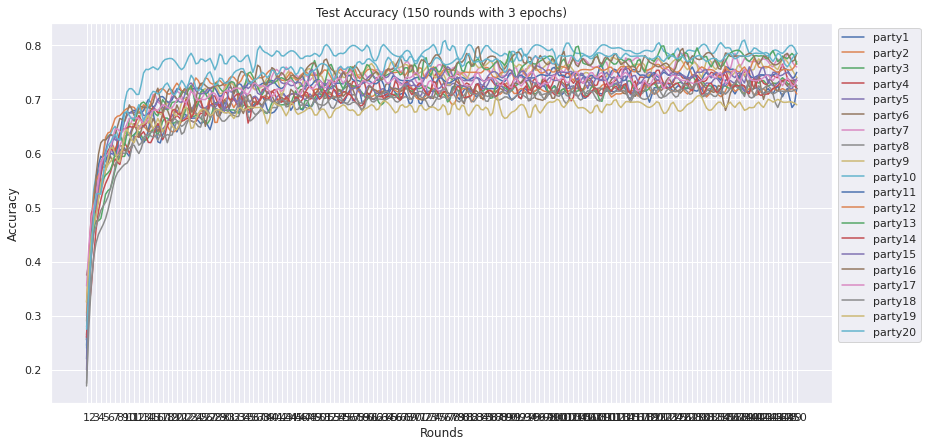

In [6]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Rounds')
plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_accuracy.png', dpi=200)
plt.show()

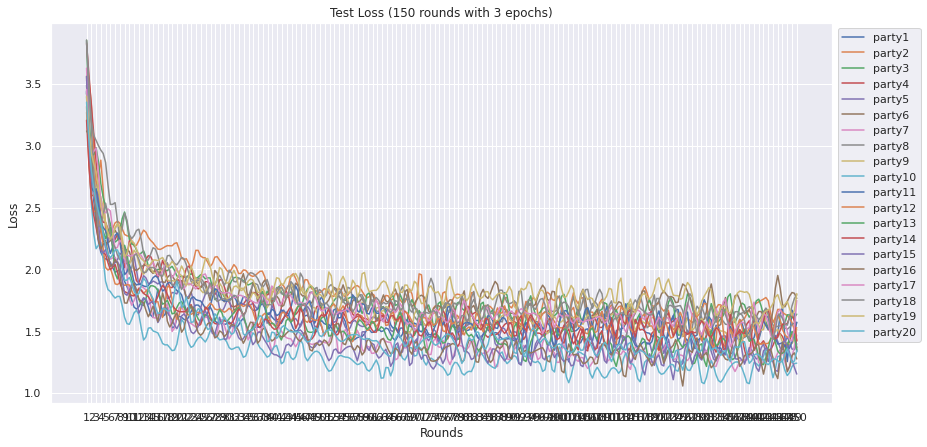

In [7]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Rounds')
plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_loss.png', dpi=200)
plt.show()

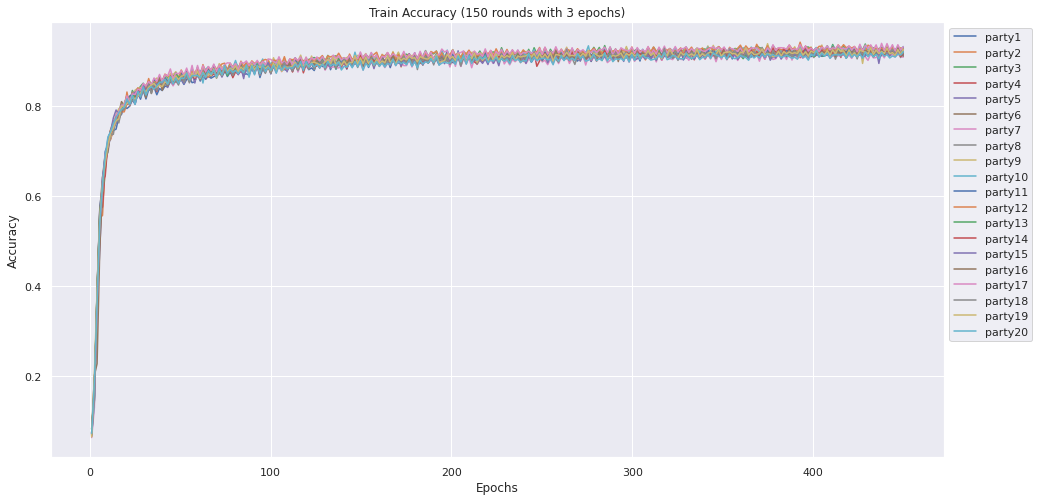

In [8]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_accuracy.png', dpi=200)
plt.show()

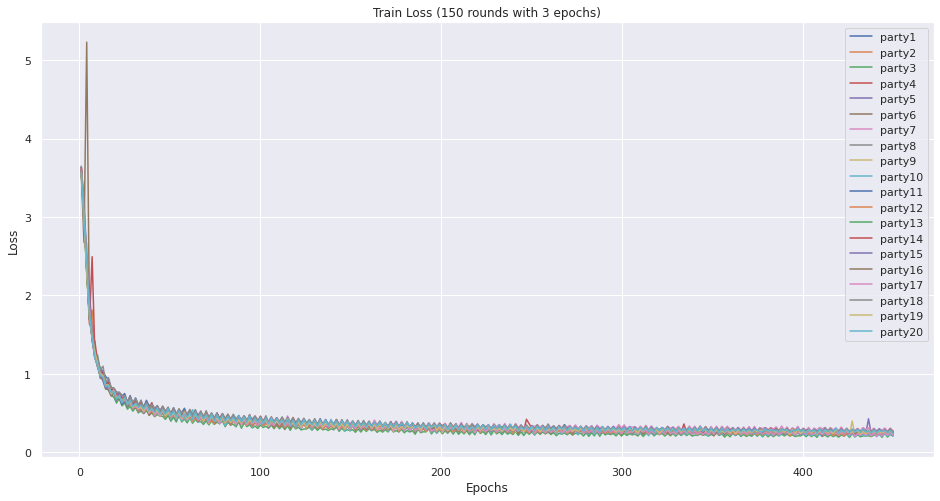

In [9]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_loss.png', dpi=200)
plt.show()

In [10]:
aggregator.model_synch()

2021-06-10T20:44:25.003Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating global model sync requests.
2021-06-10T20:44:25.005Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Sync Global Model<ibmfl.model.model_update.ModelUpdate object at 0x7f7460383630>
2021-06-10T20:44:25.006Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T20:44:26.476Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T20:44:26.477Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T20:44:26.477Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T20:44:26.478Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished sync model requests


In [11]:
aggregator.eval_model()

2021-06-10T20:44:26.483Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating evaluation requests.
2021-06-10T20:44:26.484Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T20:44:27.907Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T20:44:27.908Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T20:44:27.908Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T20:44:27.908Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished evaluate model requests.
2021-06-10T20:44:27.909Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished eval requests


In [12]:
aggregator.save_model()

2021-06-10T20:44:27.914Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating save model request.
2021-06-10T20:44:27.915Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T20:44:30.927Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T20:44:30.928Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T20:44:30.928Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T20:44:30.929Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished saving the models.
2021-06-10T20:44:30.929Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished save requests
